SOLVING DATASET USING BASIC CNN MODEL

IMPORT NECESSARY LIBRARIES:-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
print('Importing successfully done')

Importing successfully done


LOAD CIFAR-100 DATASET:-

In [2]:
# Load CIFAR-10 dataset

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

In [3]:
#Summarize the dataset:

#The CIFAR-100 dataset is a widely used benchmark for image classification tasks in machine learning. 
#The dataset consists of 60,000 color images, each of size 32x32 pixels. 
#These images are divided into 50,000 training images and 10,000 test images.
#There are 100 different classes in CIFAR-100, each containing 600 images. 
#The classes are mutually exclusive, meaning each image belongs to one and only one class.
#The 100 classes are grouped into 20 superclasses. Each superclass contains five related classes. 
#For eg; the superclass "vehicles 1" includes classes such as bicycle, bus, motorcycle, pickup truck, and train.
#Each image in the dataset comes with a fine label (one of the 100 classes) and a coarse label (one of the 20 superclasses).
#The CIFAR-100 dataset is used to train and evaluate machine learning models, particularly for tasks related to image recognition and classification.

PRE-PROCESSING THE DATASET:-

In [4]:
# Print the shape of the data

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


DISPLAY IMAGES TO VERIFY THE DATA:-

In [5]:
# CIFAR-100, display of labels
cifar100_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
                   'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
                   'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
                   'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
                   'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 
                   'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 
                   'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                   'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
                   'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 
                   'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

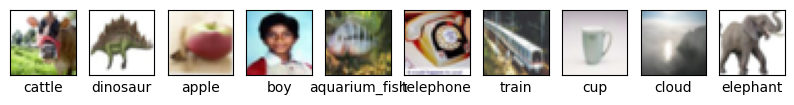

In [6]:
# Function to plot images
def plot_images(images, labels, classes, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i][0]])
    plt.show()
    
# Plot some training images
plot_images(train_images, train_labels, cifar100_labels)

FEATURE SCALING OF THE DATA :-

In [7]:
# Normalize the images to a range of 0 to 1

train_images, test_images = train_images / 255.0, test_images / 255.0

LOAD THE MODEL:-

In [8]:
# We import additional libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print('Importing successfully done')

Importing successfully done


CREATING SEQUENTIAL MODEL (CNN)

In [9]:
# Build the model

model = Sequential()
model

<Sequential name=sequential, built=False>

ASSIGNING CONVOLUTIONAL LAYERS AND MAXPOOLING TO THE DATA

In [10]:
# Add layers to the model

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\torne\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ADDING DENSE LAYERS:-

In [11]:
# Flatten the results to feed into a dense layer

model.add(layers.Flatten())

In [12]:
# Fully connected layer

model.add(layers.Dense(64, activation='relu'))

In [13]:
# Output layer

model.add(layers.Dense(100))  # CIFAR-100 has 100 classes

COMPILE THE MODEL(CNN):-

In [14]:
# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,268 (309.64 KB)

 Trainable params: 79,268 (309.64 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL(CNN):-

In [16]:
history = model.fit(train_images, train_labels,batch_size=64, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 57ms/step - accuracy: 0.0459 - loss: 4.3028 - val_accuracy: 0.1459 - val_loss: 3.6656
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.1676 - loss: 3.5221 - val_accuracy: 0.2003 - val_loss: 3.3626
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.2163 - loss: 3.2247 - val_accuracy: 0.2427 - val_loss: 3.1271
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.2536 - loss: 3.0321 - val_accuracy: 0.2541 - val_loss: 3.0572
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.2807 - loss: 2.8775 - val_accuracy: 0.2690 - val_loss: 2.9753
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3072 - loss: 2.7731 - val_accuracy: 0.3014 - val_loss: 2.8286
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.3225 - loss: 2.6771 - val_accuracy: 0.3090 - val_loss: 2.7811
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3392 - loss: 2.5973 - 

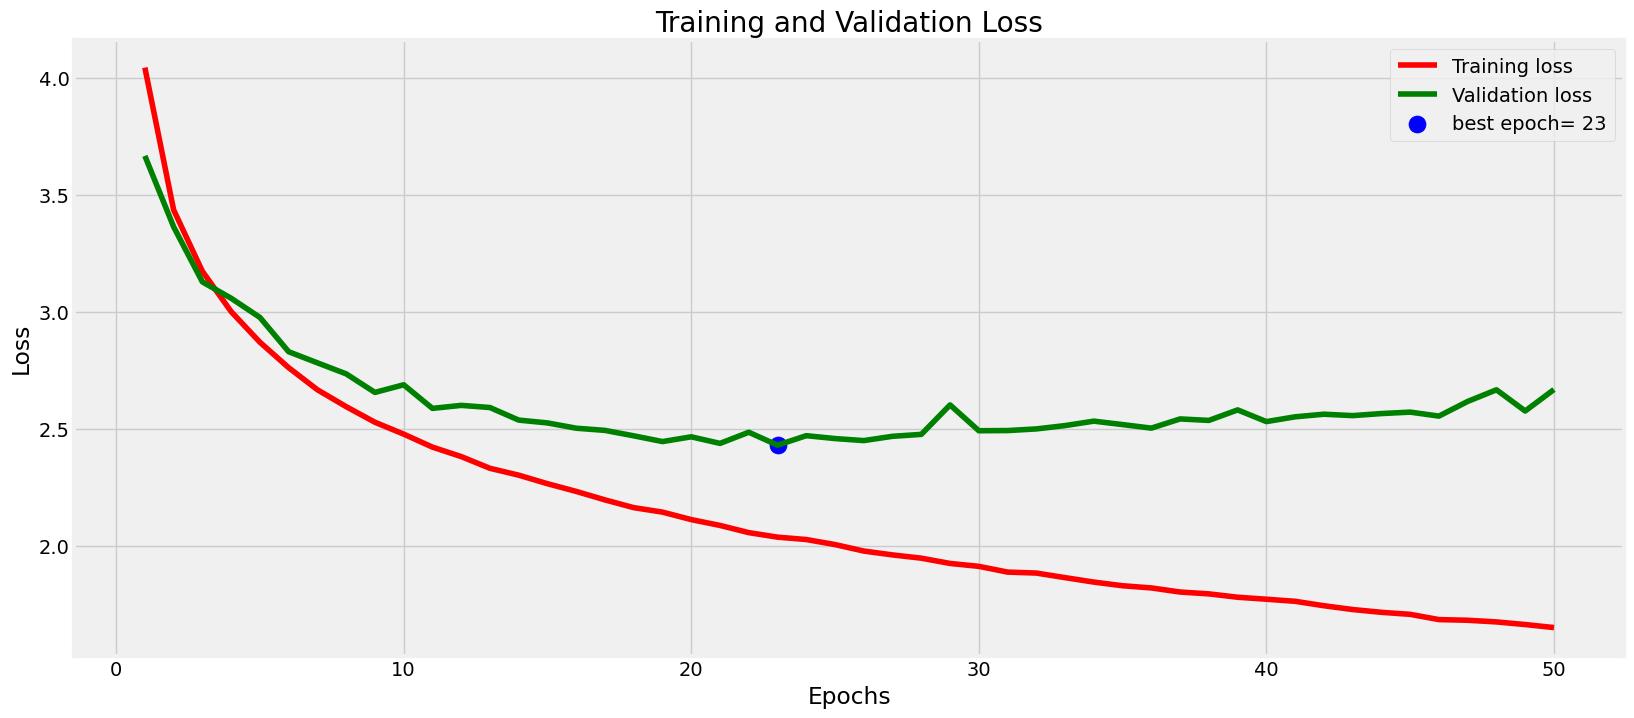

In [17]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [18]:
# Accuracy score:

val_accuracy = np.max(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 38.64%


EVALUATE THE MODEL (CNN):-

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 3s - 9ms/step - accuracy: 0.3716 - loss: 2.6689
Test accuracy: 0.37


PLOT TRAINING HISTORY:-

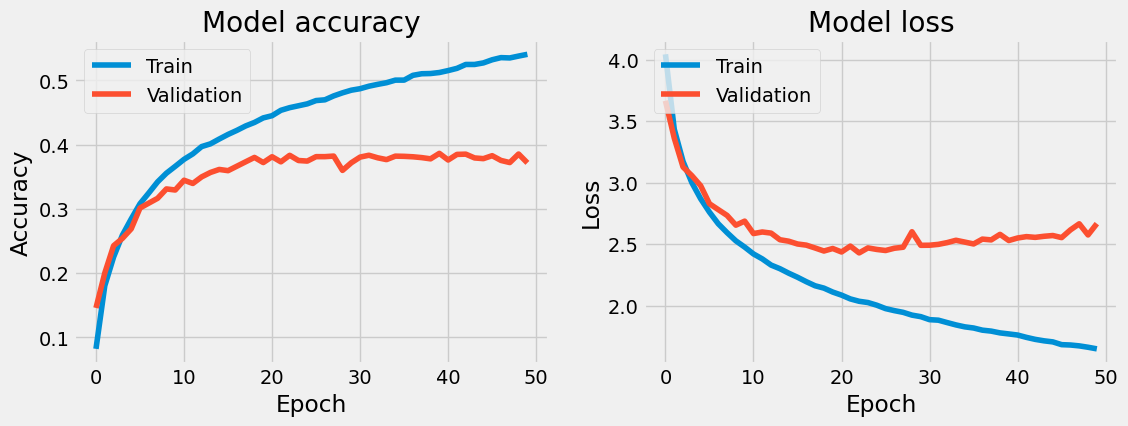

In [20]:
# Visualize training history

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [21]:
# Result:
# The val_accuracy obtaned is 38.64%
# The test accuracy obtained is 37 %
# The best epoch was at 23rd cycle.